# 미니 프로젝트: 장애인 콜택시 대기시간 예측 모델 개발
> 일기 예보에 따라 장애인 콜택시 대기 시간을 예측하는 모델을 개발하여 장애인 이동권 개선

<img src = "https://www.sisul.or.kr/open_content/calltaxi/images/visual_img.jpg"/>

## 단계3. 모델링

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *

In [2]:
df = joblib.load('Dataset/preprocess_data2.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2923 non-null   datetime64[ns]
 1   average_wait_time       2923 non-null   float64       
 2   weekday                 2923 non-null   category      
 3   season                  2923 non-null   category      
 4   week                    2923 non-null   int32         
 5   holiday                 2923 non-null   object        
 6   week_average_wait_time  2923 non-null   float64       
 7   ride_ratio              2923 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 131.5+ KB


### (1) 가변수화
- 범주형 데이터 수치형 데이터로 변경

In [4]:
# 가변수화
df = pd.get_dummies(df, columns = ['weekday', 'season', 'holiday'], drop_first = True, dtype = int)

### (2) 데이터분할

#### 1) Feature, Target 분할

In [5]:
# X와 y 분리
target = 'average_wait_time'

X = df.drop(['Date', target], axis=1)
y = df.loc[:, target]

#### 2) Train, Valid 분할

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 91, shuffle = True, random_state=1)

### (3) 정규화 (Scaling)
* KNN, SVM 알고리즘을 적용하기 위해서는 스케일링을 해야 합니다.

In [7]:
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train)
X_valid_n = scaler.transform(X_valid)

### (4) 모델링

In [8]:
result = {}

In [9]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

#### LinearRegression 모델

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print("MAE:", mean_absolute_error(y_valid, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_valid, y_pred))
print("R2-score:", r2_score(y_valid, y_pred))

MAE: 4.731330515100562
MAPE: 0.12508865841508654
R2-score: 0.718492044520911


In [11]:
result['LinearRegression'] = r2_score(y_valid, y_pred)

#### DecisionTreeRegressor 모델

In [12]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print("MAE:", mean_absolute_error(y_valid, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_valid, y_pred))
print("R2-score:", r2_score(y_valid, y_pred))

MAE: 4.98894120933633
MAPE: 0.12662365545082863
R2-score: 0.6675038843143617


In [13]:
result['DecisionTreeRegressor'] = r2_score(y_valid, y_pred)

#### KNeighborsRegressor 모델

In [14]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

model.fit(X_train_n, y_train)

y_pred = model.predict(X_valid_n)

print("MAE:", mean_absolute_error(y_valid, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_valid, y_pred))
print("R2-score:", r2_score(y_valid, y_pred))

MAE: 4.925054945054945
MAPE: 0.13302647188311792
R2-score: 0.7180855588478746


In [15]:
result['KNeighborsRegressor'] = r2_score(y_valid, y_pred)

#### RandomForestRegressor 모델

In [16]:
from sklearn.ensemble  import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=1)


model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print("MAE:", mean_absolute_error(y_valid, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_valid, y_pred))
print("R2-score:", r2_score(y_valid, y_pred))

MAE: 4.6317350716201835
MAPE: 0.11941659571501172
R2-score: 0.6929877236265184


In [17]:
result['RandomForestRegressor'] = r2_score(y_valid, y_pred)

#### XGBRegressor 모델

In [18]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=5, n_estimators=100, random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print("MAE:", mean_absolute_error(y_valid, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_valid, y_pred))
print("R2-score:", r2_score(y_valid, y_pred))

MAE: 4.488359489021722
MAPE: 0.11582682400892243
R2-score: 0.7326030140572657


In [19]:
result['XGBRegressor'] = r2_score(y_valid, y_pred)

#### LGBMRegressor 모델

In [20]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(max_depth=5, n_estimators=100, random_state=1,verbose=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print("MAE:", mean_absolute_error(y_valid, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_valid, y_pred))
print("R2-score:", r2_score(y_valid, y_pred))

MAE: 4.1947627301141
MAPE: 0.10897537419302979
R2-score: 0.7563618121416789


In [21]:
result['LGBMRegressor'] = r2_score(y_valid, y_pred)

### (5) 모델별 비교


In [22]:
result

{'LinearRegression': 0.718492044520911,
 'DecisionTreeRegressor': 0.6675038843143617,
 'KNeighborsRegressor': 0.7180855588478746,
 'RandomForestRegressor': 0.6929877236265184,
 'XGBRegressor': 0.7326030140572657,
 'LGBMRegressor': 0.7563618121416789}

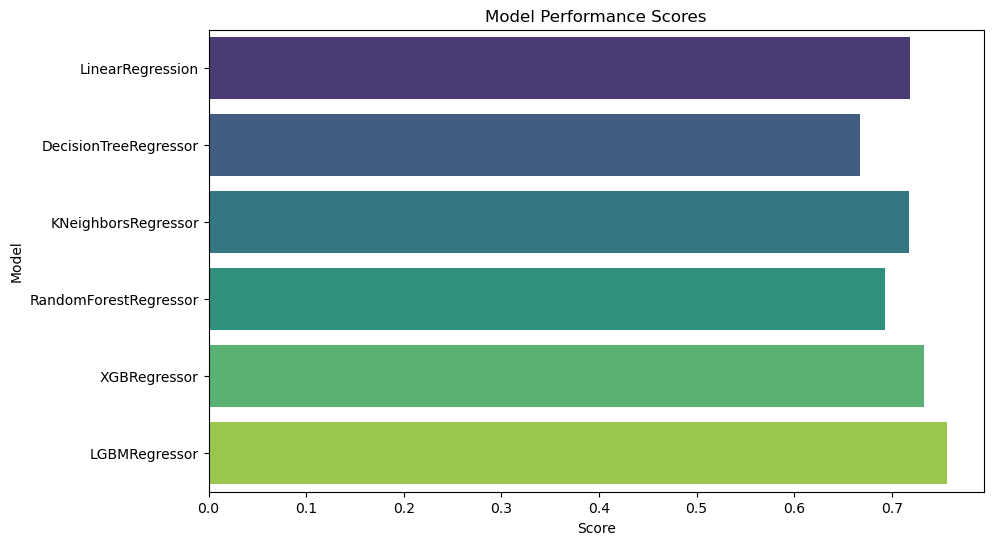

In [23]:
# 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(list(result.items()), columns=['Model', 'Score'])

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Model', data=df, palette='viridis')
plt.xlabel('Score')
plt.ylabel('Model')
plt.title('Model Performance Scores')
plt.show()